# PyGMT 練習帳

 [GMT](https://www.generic-mapping-tools.org/) のPython wrapper である [pygmt](https://www.pygmt.org/) の地震学分野向けチュートリアル．
 
網羅的に書いているわけではありませんので，GMTの基本的な利用方法を知っている人でないと，わかりにくいかもしれません．

## PyGMTのインストール

Anacondaの場合

```bash
$ conda install pygmt -c conda-forge
```

pipの場合

```bash
$ pip install pygmt
```

環境にGMTがインストールされていることも必要です．

## 準備：モジュールの読み込み

モジュール単独だけで，numpyやmatplotlibを別途importせずともちゃんと動作します．一方，データハンドリングや比較プロットのため， `numpy`と`ObsPy` も入れておくことにします．また，画像比較のための Image モジュールも利用します．

In [2]:
import pygmt

In [1]:
# その他のモジュール
import numpy as np
import obspy
import matplotlib.pyplot as plt
from IPython.display import Image

## PyGMTによる作図の基本

`pygmt`では，まず

```
fig = pygmt.Figure()
```
で図のオブジェクトを作成し，GMTのコマンドに相当する
```
fig.XXXXX()
```
を重ねていくことで作図していきます．最後に
```
fig.show()
```
とすればJupyter上に表示されますし，
```
fig.savefig(filename)
```
とすると`filename`の拡張子に応じて画像として保存されます．

## 基本の地図

まずは単純な，従来のGMTでの `gmt pscoast` コマンドに相当する地図を作図してみましょう．各オプションの意味はコード内コメントを参照してください．

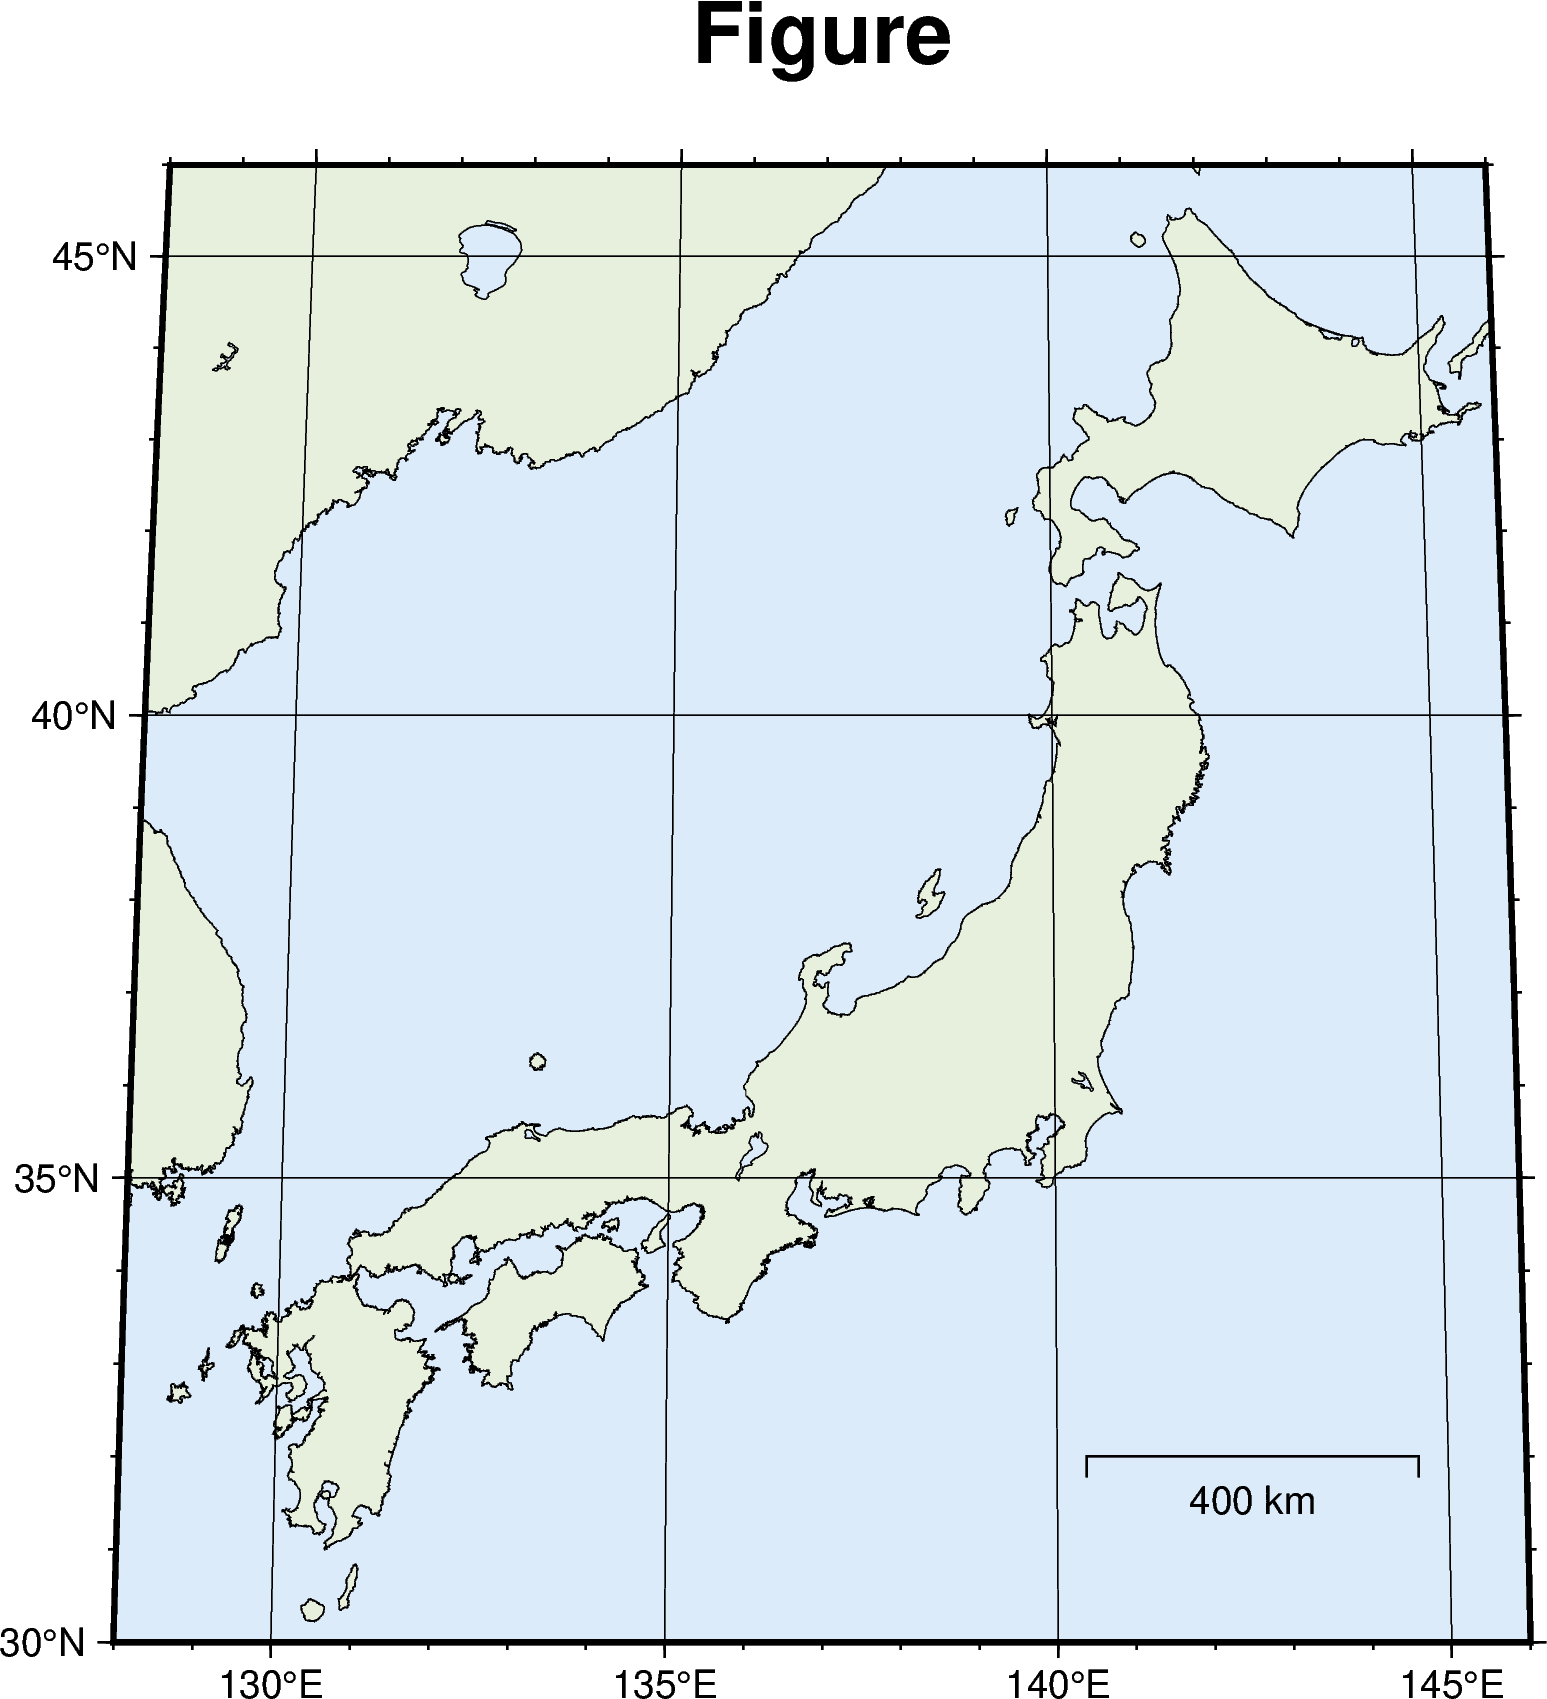

In [33]:
fig = pygmt.Figure()

fig.coast(
    projection  = 'N138/12c',                         # 投影法とサイズ．メルカトルなら 'M12c' など．
    region      = (128, 146, 30, 46),                 # 領域はリストかタプルで与える．
    shorelines  = 'default,black',                    # 海岸線のペンの設定．
    area_thresh = 100,                                # 細かい領域の描画下限 (km^2)
    resolution  = 'f',                                # 'c', 'l', 'i', 'h', 'f' の順に高くなる
    land        = '230/240/220',                      # 陸地の色
    water       = '220/235/250',                      # 水の色
    map_scale   = '142.5/32/32/400',                  # 距離スケールの水平・縦位置と距離サイズ
    frame       = ['WSen+t"Figure"', 'xafg', 'yafg']  # 南西に軸名・タイトル指定（+t) およびXY方向それぞれの軸情報
)

fig.show()
fig.savefig('fig/pygmt-coastline.png')

Jupyter Notebook内で見るだけならば `fig.show()`を指定します．画像として保存するなら `fig.savefig` ですが，`png`のほか `pdf`なども指定可能です．また，`show=True`オプションをつけると，その環境で標準のビューワ（たとえばmacOSならPreview.app）が起動します．

上記の例では `fig.coast` ひとつですべてを描画しましたが，軸の描画を `fig.basemap` に任せることもできます：

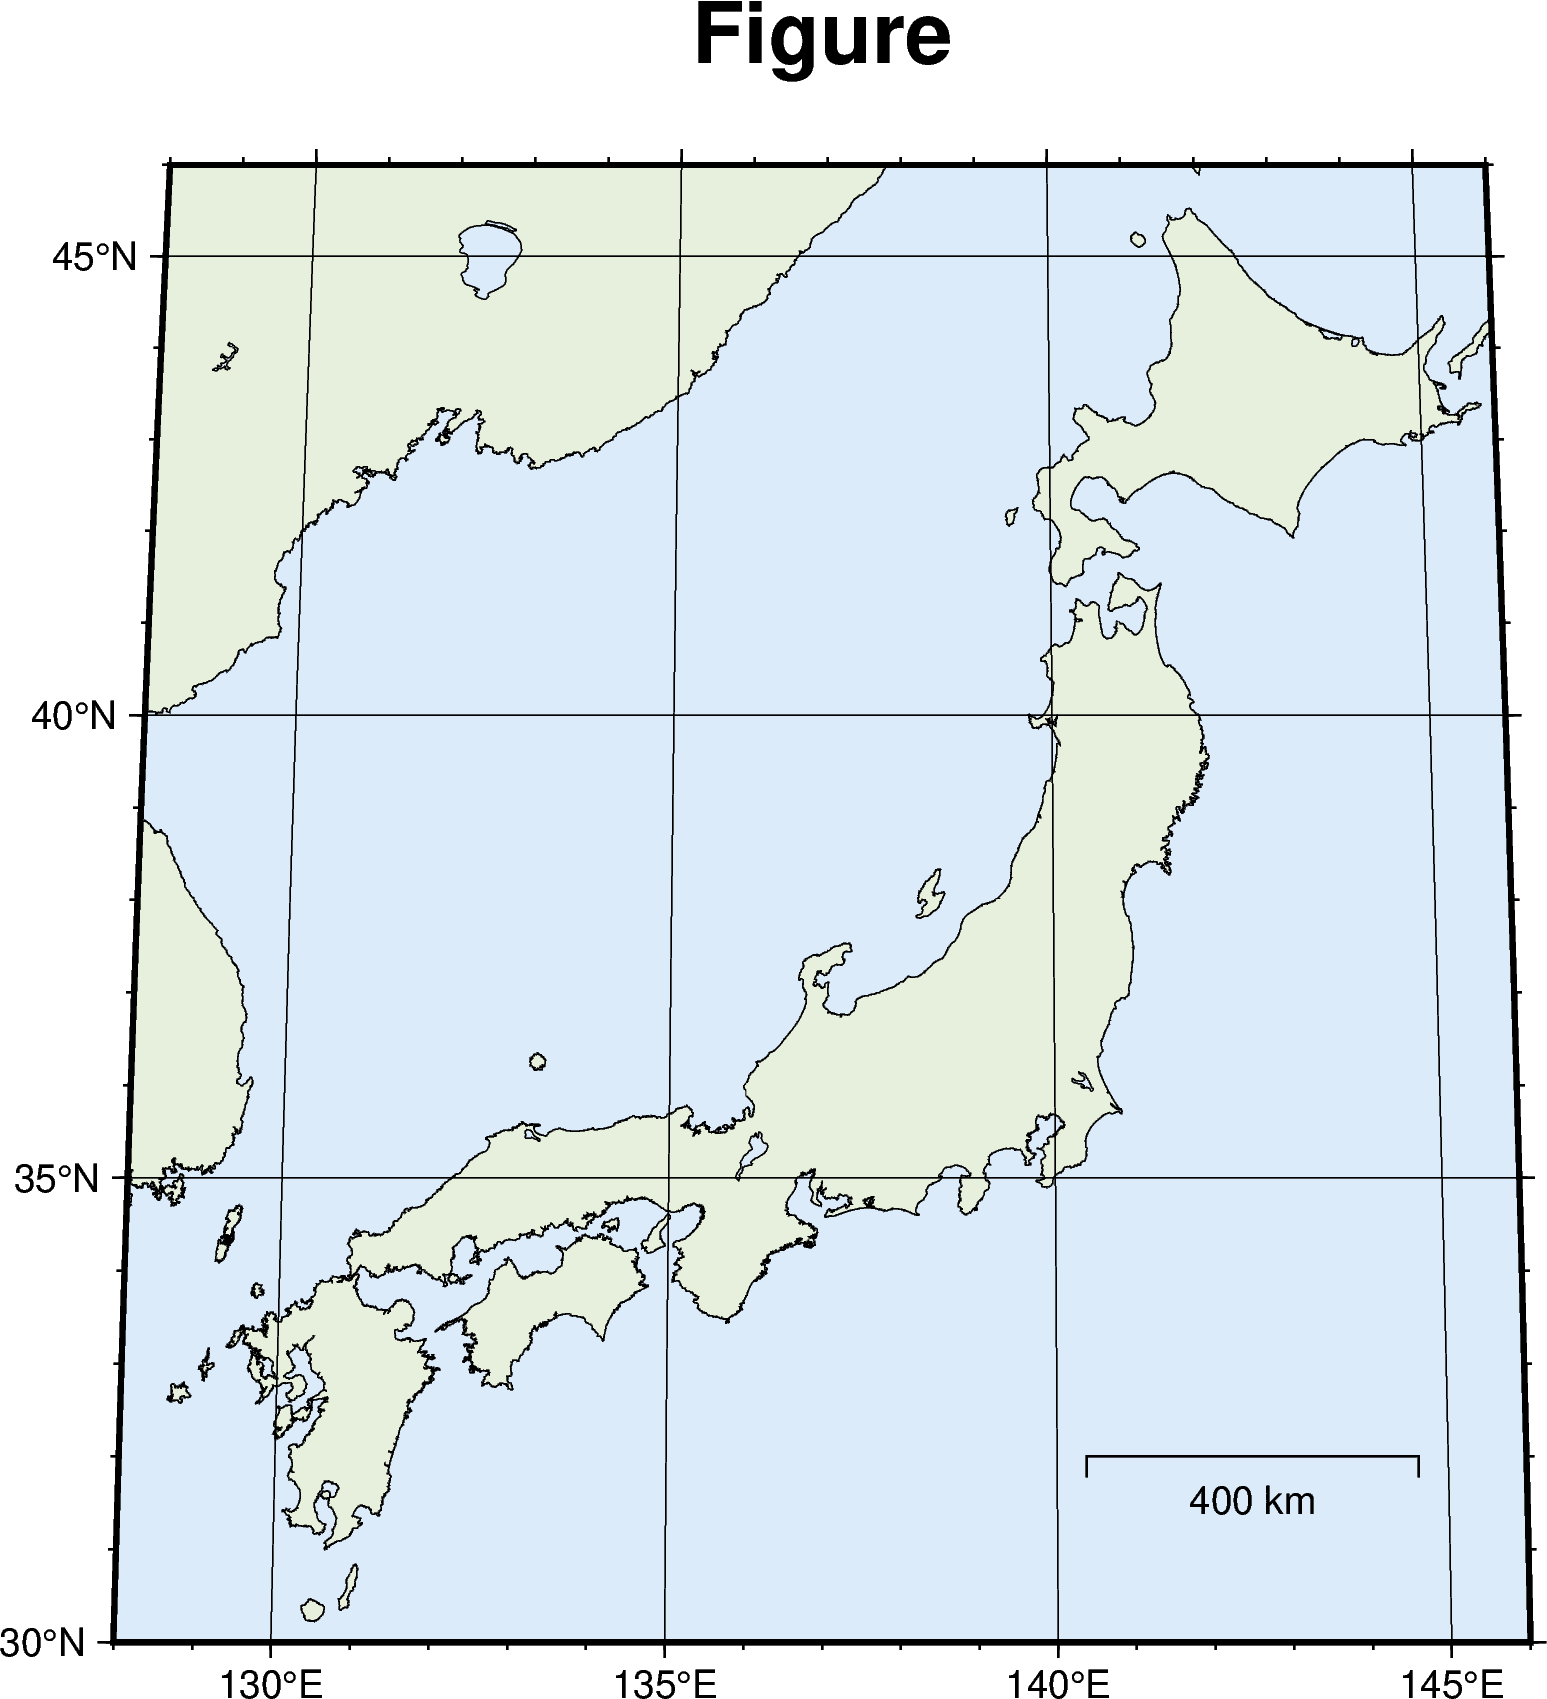

In [4]:
fig = pygmt.Figure()


fig.coast(
    projection  = 'N138/12c',          
    region      = (128, 146, 30, 46),  
    shorelines  = 'default,black',     
    area_thresh = 100,                 
    resolution  = 'f',                 
    land        = '230/240/220',       
    water       = '220/235/250',       
    map_scale   = '142.5/32/32/400',   
)

fig.basemap(
    frame       = ['WSen+t"Figure"', 'xafg', 'yafg'] 
)

fig.show()


上記の例では，`fig.basemap` のオプションは `frame` しかないことに注目です．
必須と思える `projection` や `region` といったオプションは，その前の `fig.coast` で用いられた値が自動的に引き継がれています．

### エイリアス

PyGMTでは，従来のGMTと比べてオプションの意味が多くの人にとってわかりやすい名前がつけられています．一方，昔からのGMTのオプション名を把握している筆者のような古代人向け（？）に，従来オプション名のエイリアスも設定されています．たとえば先程の地図は，以下のようなエイリアスオプション名を用いて作成することもできます．初めて見る人には全く意味不明のオプションでしょうが，GMTに馴染みのある人にはむしろ使いやすいかもしれません．

/var/folders/dl/pgv96j_j0yv56n1r1t82zq1c0009rj/T/ipykernel_10387/605710792.py:3: SyntaxWarning: Short-form parameter (R) is not recommended. Use long-form parameter 'region' instead.
  fig.coast(
/var/folders/dl/pgv96j_j0yv56n1r1t82zq1c0009rj/T/ipykernel_10387/605710792.py:3: SyntaxWarning: Short-form parameter (J) is not recommended. Use long-form parameter 'projection' instead.
  fig.coast(
/var/folders/dl/pgv96j_j0yv56n1r1t82zq1c0009rj/T/ipykernel_10387/605710792.py:3: SyntaxWarning: Short-form parameter (A) is not recommended. Use long-form parameter 'area_thresh' instead.
  fig.coast(
/var/folders/dl/pgv96j_j0yv56n1r1t82zq1c0009rj/T/ipykernel_10387/605710792.py:3: SyntaxWarning: Short-form parameter (B) is not recommended. Use long-form parameter 'frame' instead.
  fig.coast(
/var/folders/dl/pgv96j_j0yv56n1r1t82zq1c0009rj/T/ipykernel_10387/605710792.py:3: SyntaxWarning: Short-form parameter (D) is not recommended. Use long-form parameter 'resolution' instead.
  fig.coast(
/var/fol

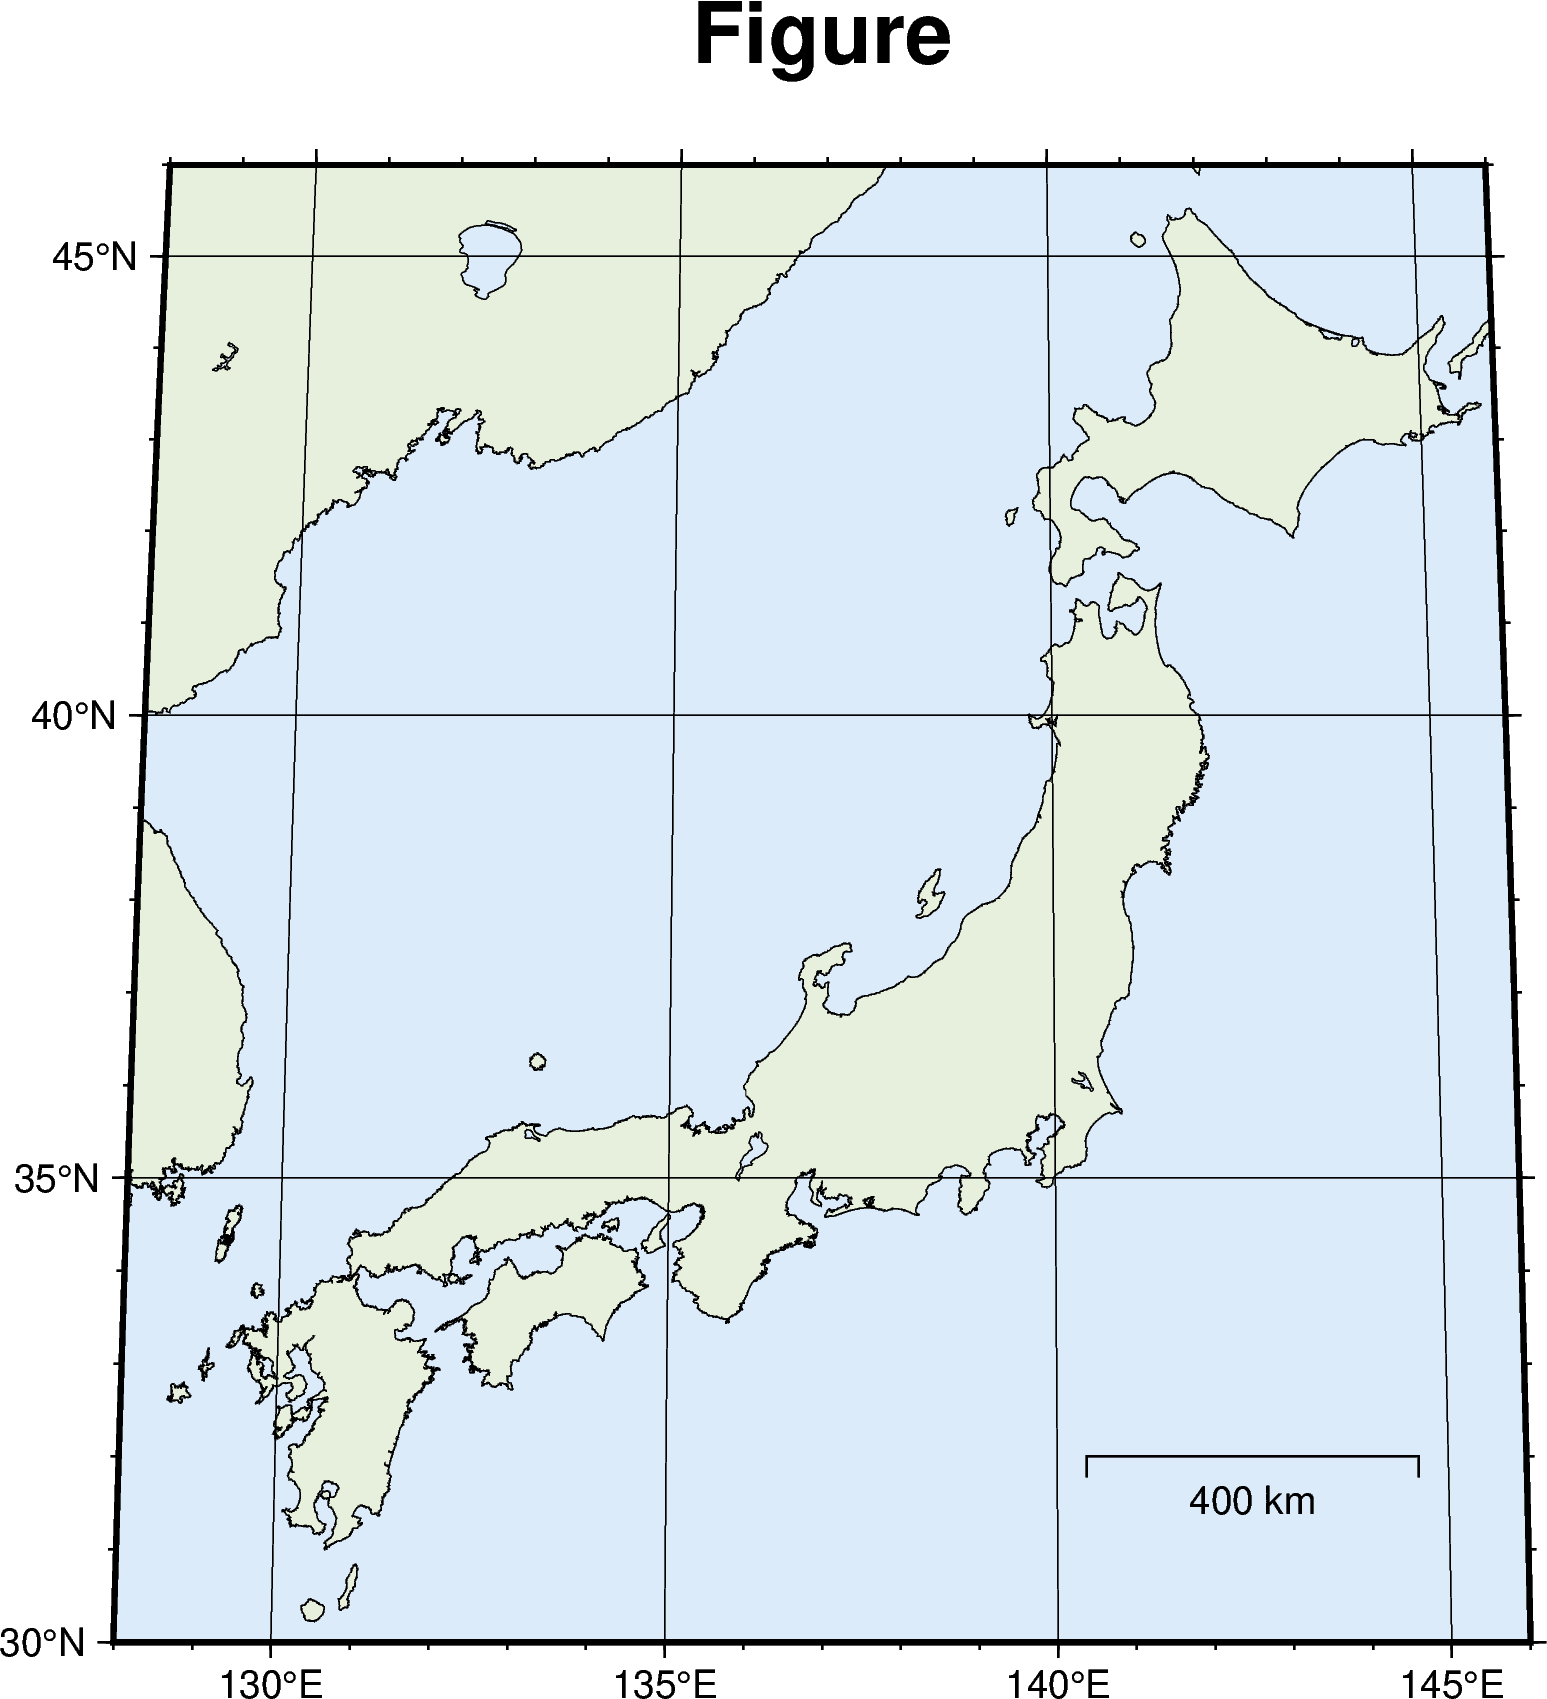

In [5]:
fig = pygmt.Figure()

fig.coast(
    J = 'N138/12c',                        
    R = (128, 146, 30, 46),                
    W = 'default,black',                   
    A = 100,                               
    D = 'f',                               
    G = '230/240/220',                     
    S = '220/235/250',                     
    L = '142.5/32/32/400',                 
    B = ['WSen+t"Figure"', 'xafg', 'yafg'] 
)

fig.show()

オプション名のエイリアスなので当然ですが，結果として得られる画像は全く同じです．ただし，
```text
SyntaxWarning: Short-form parameter (R) is not recommended. 
               Use long-form parameter 'region' instead.
```
のような警告がたくさん出てきます．

```{tip}
従来のGMTユーザーは，この警告を逆手にとって，まず自分の知っている short-form オプションでpygmtを動かしてみて，
そこで表示される `SyntaxWarning` を見て現代的な long-form parameter 名を調べるようにすると，ドキュメントを引く手間が省けてよいかもしれません．

```

### 従来型のGMTスクリプトとの比較

### pygmtとシェルスクリプトの比較

これまでに紹介した PyGMTのスクリプトと，それらと（ほとんど）同じ図を出力するbashによる従来型のGMTスクリプトを比較してみます．以下のタブをクリックするとコードが表示されます．なお，比較しやすいようできるだけ改行を多めに書いています．

````{tabbed} pygmt long

```python
fig = pygmt.Figure()

fig.coast(
    projection  = 'N138/12c',
    region      = (128, 146, 30, 46),
    shorelines  = 'default,black',
    area_thresh = 100,
    resolution  = 'f',
    land        = '230/240/220',
    water       = '220/235/250',
    map_scale   = '142.5/32/32/400',
    frame       = ['WSen+t"Figure"', 'xafg', 'yafg']
)
```
````
````{tabbed} pygmt short
```python
fig = pygmt.Figure()

fig.coast(
    J = 'N138/12c',                        
    R = (128, 146, 30, 46),                
    W = 'default,black',                   
    A = 100,                               
    D = 'f',                               
    G = '230/240/220',                     
    S = '220/235/250',                     
    L = '142.5/32/32/400',                 
    B = ['WSen+t"Figure"', 'xafg', 'yafg'] 
)
```
````
````{tabbed} bash classic
```bash
#!/bin/bash

# 海岸線と枠を描画
gmt pscoast -JN138/12c \
            -R128/146/30/46 \
            -Wdefault,black \
            -A100 \
            -Df \
            -G230/240/220 \
            -S220/235/250 \
            -L142.5/32/32/400 \
            -BWSen+t"Figure" -Bxafg -Byafg \
> fig/classic-coastline.ps

# Postscript画像をPNGに変換
gmt psconvert -Tg -A -P -Qg2 -Qt2 fig/classic-coastline.ps

# 不要な中間生成物であるPostscriptを削除
rm -f fig/classic-coastline.ps
```
````
````{tabbed} bash modern
```bash
#!/bin/bash

# modern mode では gmt begin ~ end の間でコマンド実行．
gmt begin fig/modern-coastline png

    gmt coast \
        -JN138/12c \
        -R128/146/30/46 \
        -Wdefault,black \
        -A100 \
        -Df \
        -G230/240/220 \
        -S220/235/250 \
        -L142.5/32/32/400 \
        -BWSen+t"Figure" -Bxafg -Byafg 
        
gmt end
```
````

このような単一のコマンドからなるスクリプトではあまり差が大きくありませんが，コードの可読性は一番左のpygmt long optionがもっとも高いでしょう．また，PyGMTとGMT6 modern modeでは複数のGMTコマンドを用いる図においてミスを犯しやすい `-O` と `-K` オプションが不要であったり，現代では直接用いることはあまりない（と思われる）Postscriptファイルから他形式に変換する手間が省けています．

## 地図上への情報描画

### データの準備

pygmtが用意しているexampleデータに日本列島周辺の地震情報がありますので，それを題材にしてプロットしてみましょう．

In [8]:
hypdata = pygmt.datasets.load_japan_quakes()

上記コマンドはデモンストレーション用のデータセットの読み込みの専用コマンドです．オンラインからデータを読み込むので多少時間がかかります．

震源情報は，pandasのデータフレームとして変数 `data` に格納されます．ただしここではpandasの細かい利用法を意識する必要はありません．`print`してみると，ほどよく途中を省略してデータフレームの概略を表示してくれます．

In [9]:
print(hypdata)

     year  month  day  latitude  longitude  depth_km  magnitude
0    1987      1    4     49.77     149.29       489        4.1
1    1987      1    9     39.90     141.68        67        6.8
2    1987      1    9     39.82     141.64        84        4.0
3    1987      1   14     42.56     142.85       102        6.5
4    1987      1   16     42.79     145.10        54        5.1
..    ...    ...  ...       ...        ...       ...        ...
110  1988     11   10     35.32     140.88        10        4.0
111  1988     11   29     35.88     141.47        46        4.0
112  1988     12    3     43.53     146.98        39        4.3
113  1988     12   20     43.94     146.13       114        4.5
114  1988     12   21     42.02     142.45        73        4.5

[115 rows x 7 columns]


Pandasのデータフレームは表形式で複数の列が名前付きで含まれていることがわかるでしょう．このなかから特定の列のデータを取り出すには，たとえば
```python
data.year
```
のように `変数名.列名` とします．

### 固定サイズ単一色のプロット

まずは単純シンボルプロットから行いましょう．
`fig.plot` で x軸（経度方向）とy軸（緯度方向）のデータ配列を個別に指定します．

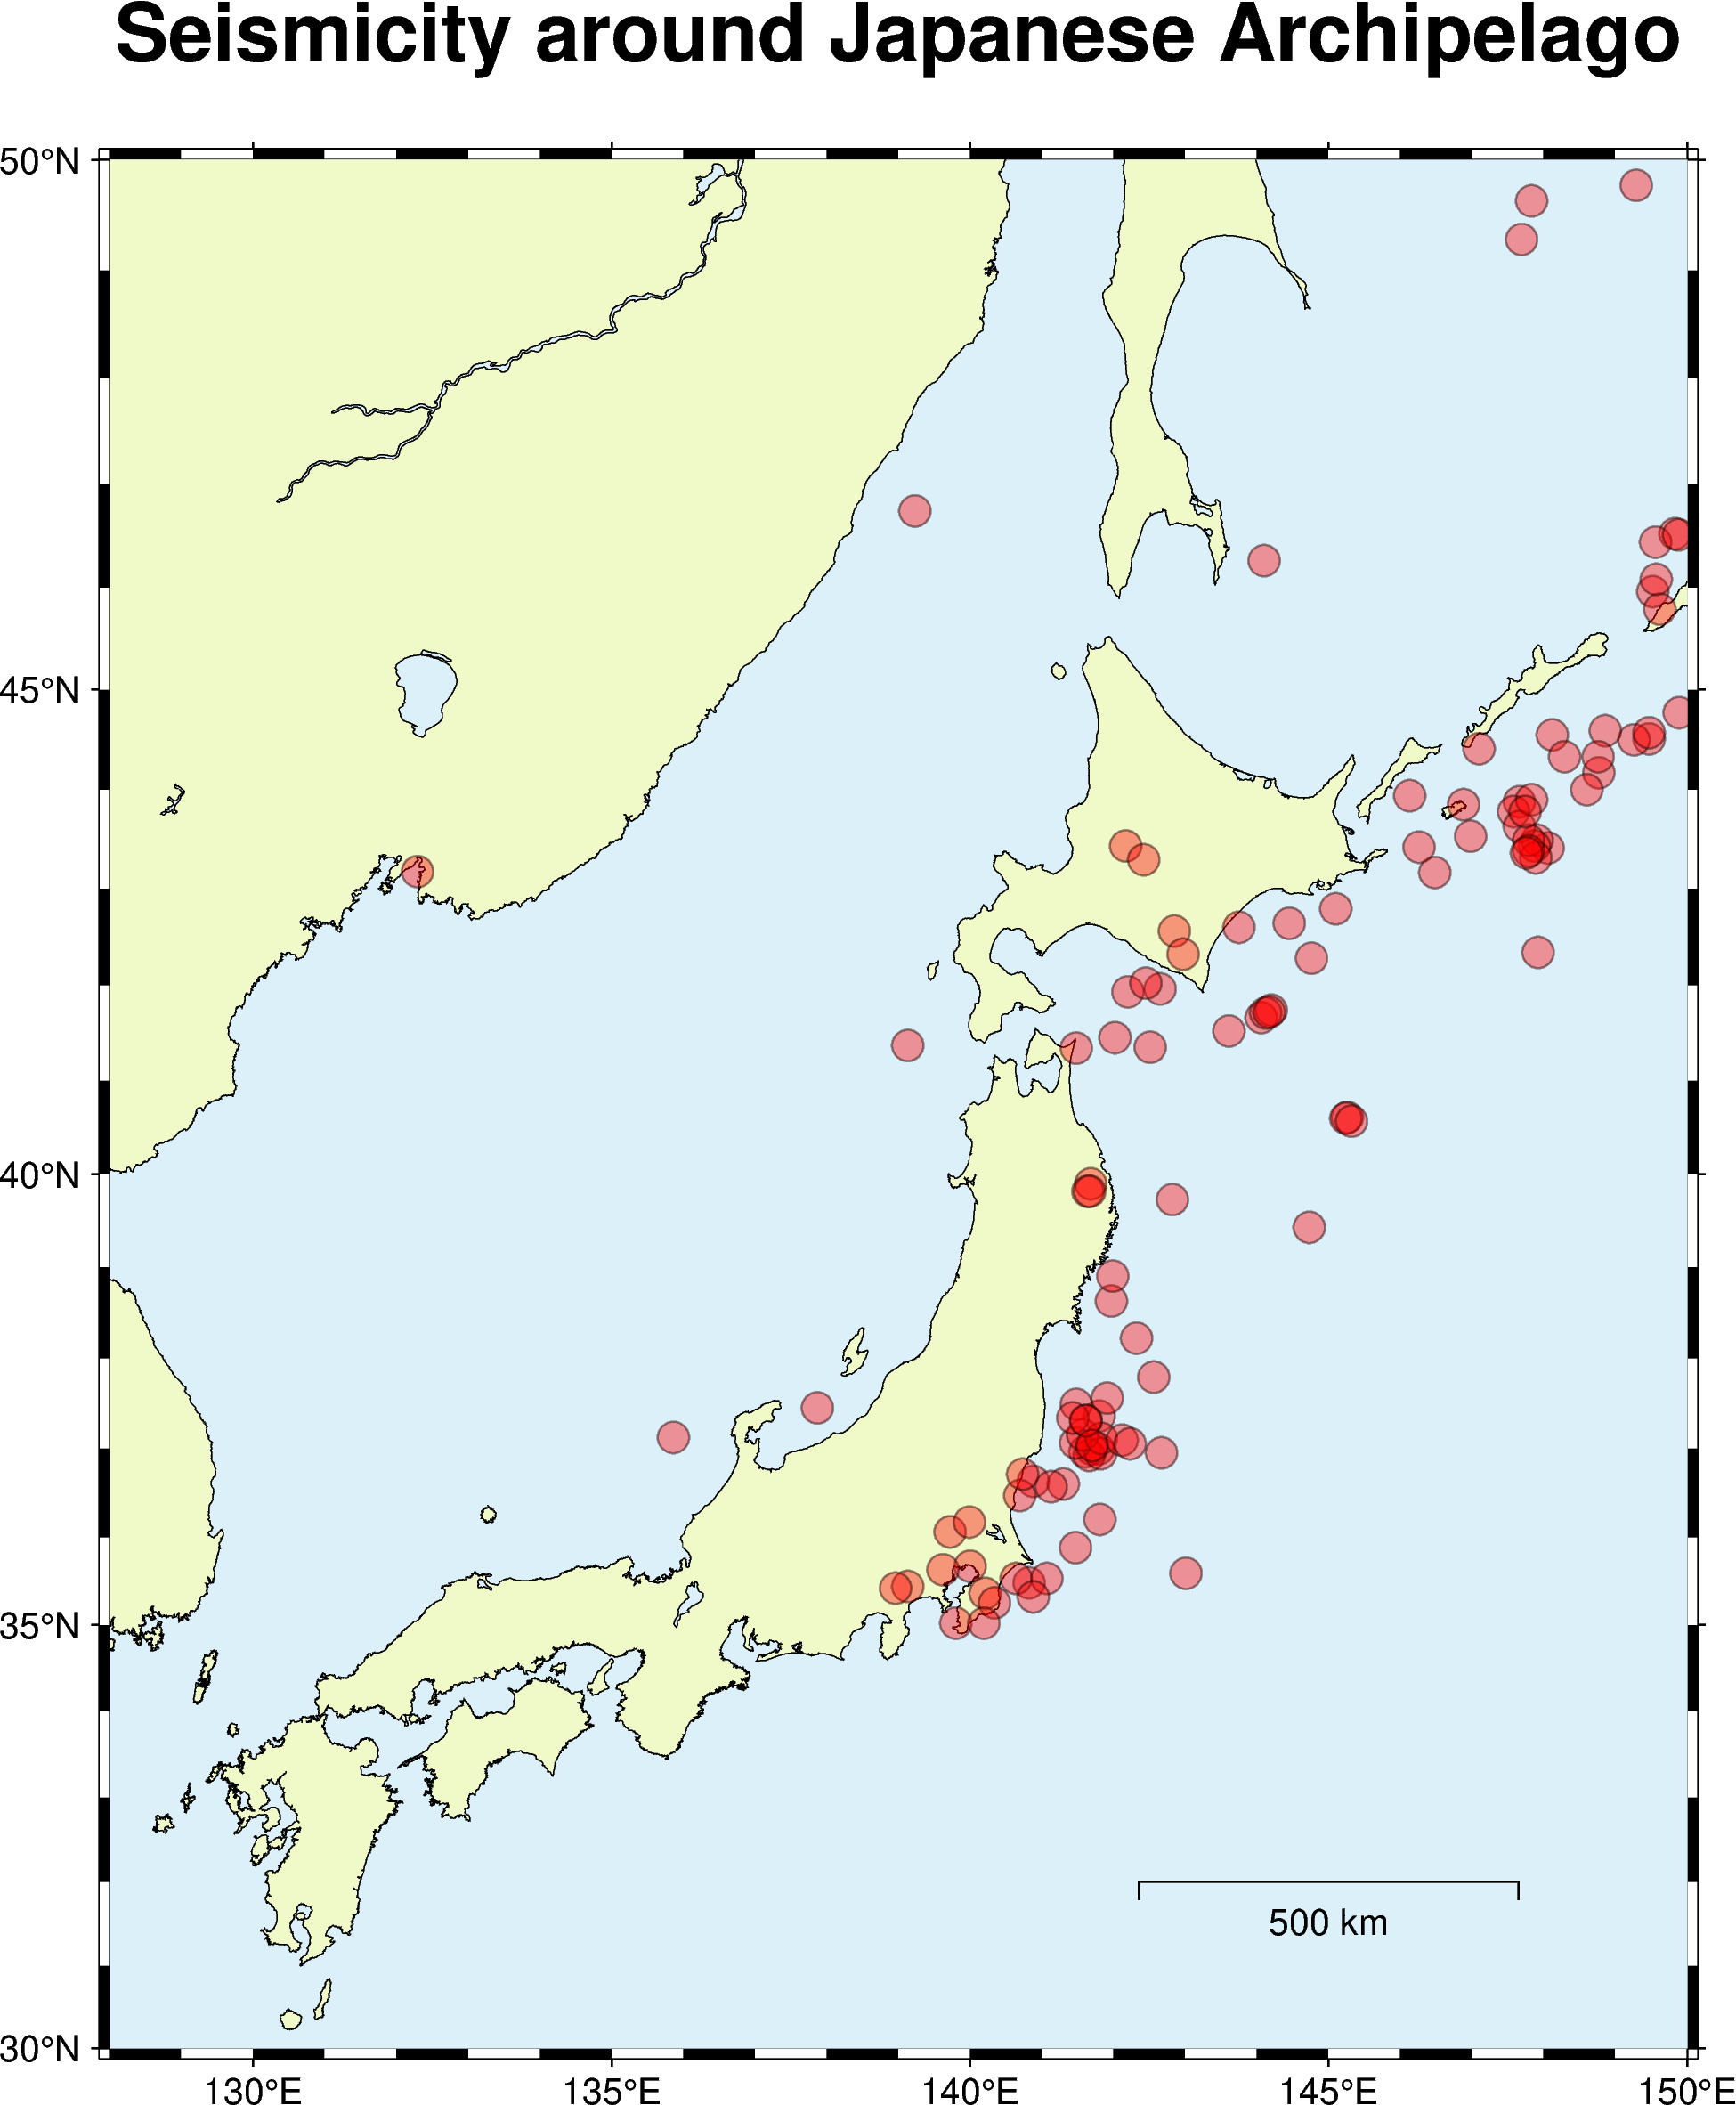

In [106]:
fig = pygmt.Figure()

fig.basemap(
    region     = [128,150,30, 50],
    projection = 'M15c', 
    frame      = ['WSen+t"Seismicity around Japanese Archipelago"', 'xaf', 'yaf'],
)

fig.coast(
    land        = '240/250/200', 
    water       = '220/240/250', 
    resolution  = 'h', 
    area_thresh = '100', 
    map_scale   = '145/32/32/500',
    shorelines  = 'default,black'
)

# 震央分布のプロット
fig.plot(
    x            = hypdata.longitude,   # 横軸データ
    y            = hypdata.latitude,    # 縦軸データ
    color        = 'red',            # 塗りつぶし色の指定
    style        = 'c0.3c',          # 固定サイズの場合は (symbol)(size) 指定
    pen          = 'thinner,black',  # 縁取りのペン
    transparency = 60                # コマンド全体に影響する透明度設定
)

fig.show()

新しいコマンド `fig.plot()` では `style` でシンボルや（固定サイズの場合は）サイズの指定を行います．

シンボルは[GMT公式ドキュメント](https://docs.generic-mapping-tools.org/latest/plot.html)の以下の図の通り：
<img src="https://docs.generic-mapping-tools.org/latest/_images/GMT_base_symbols1.png">

上記の例は，直径 0.2cm (`0.2c`）の円をプロットすることを指示しています．

その他，`tranparency` オプションでプロットするデータの透明度を指定しています．数値が100に近いほど透明に近くなっていきます．`tranparency`オプションの代わりに，色名やRGB値に

```python
color = 'red@60'
```
のように指定する方法もあります．この方法だと，たとえば塗りつぶしの色は半透明にするものの，`pen`オプションで指定する縁取りの線は不透明にする，というようなことも実現できます．

```{warning}

`transparency` オプションを `frame` を指定しているコマンドに付与すると，図の枠やラベルが半透明になってしまいます．半透明オプションの使い所には注意が必要です．
```

### 可変サイズ・可変色プロット

次に，マグニチュードと深さを用いてシンボルの色と大きさを変化させてみましょう．

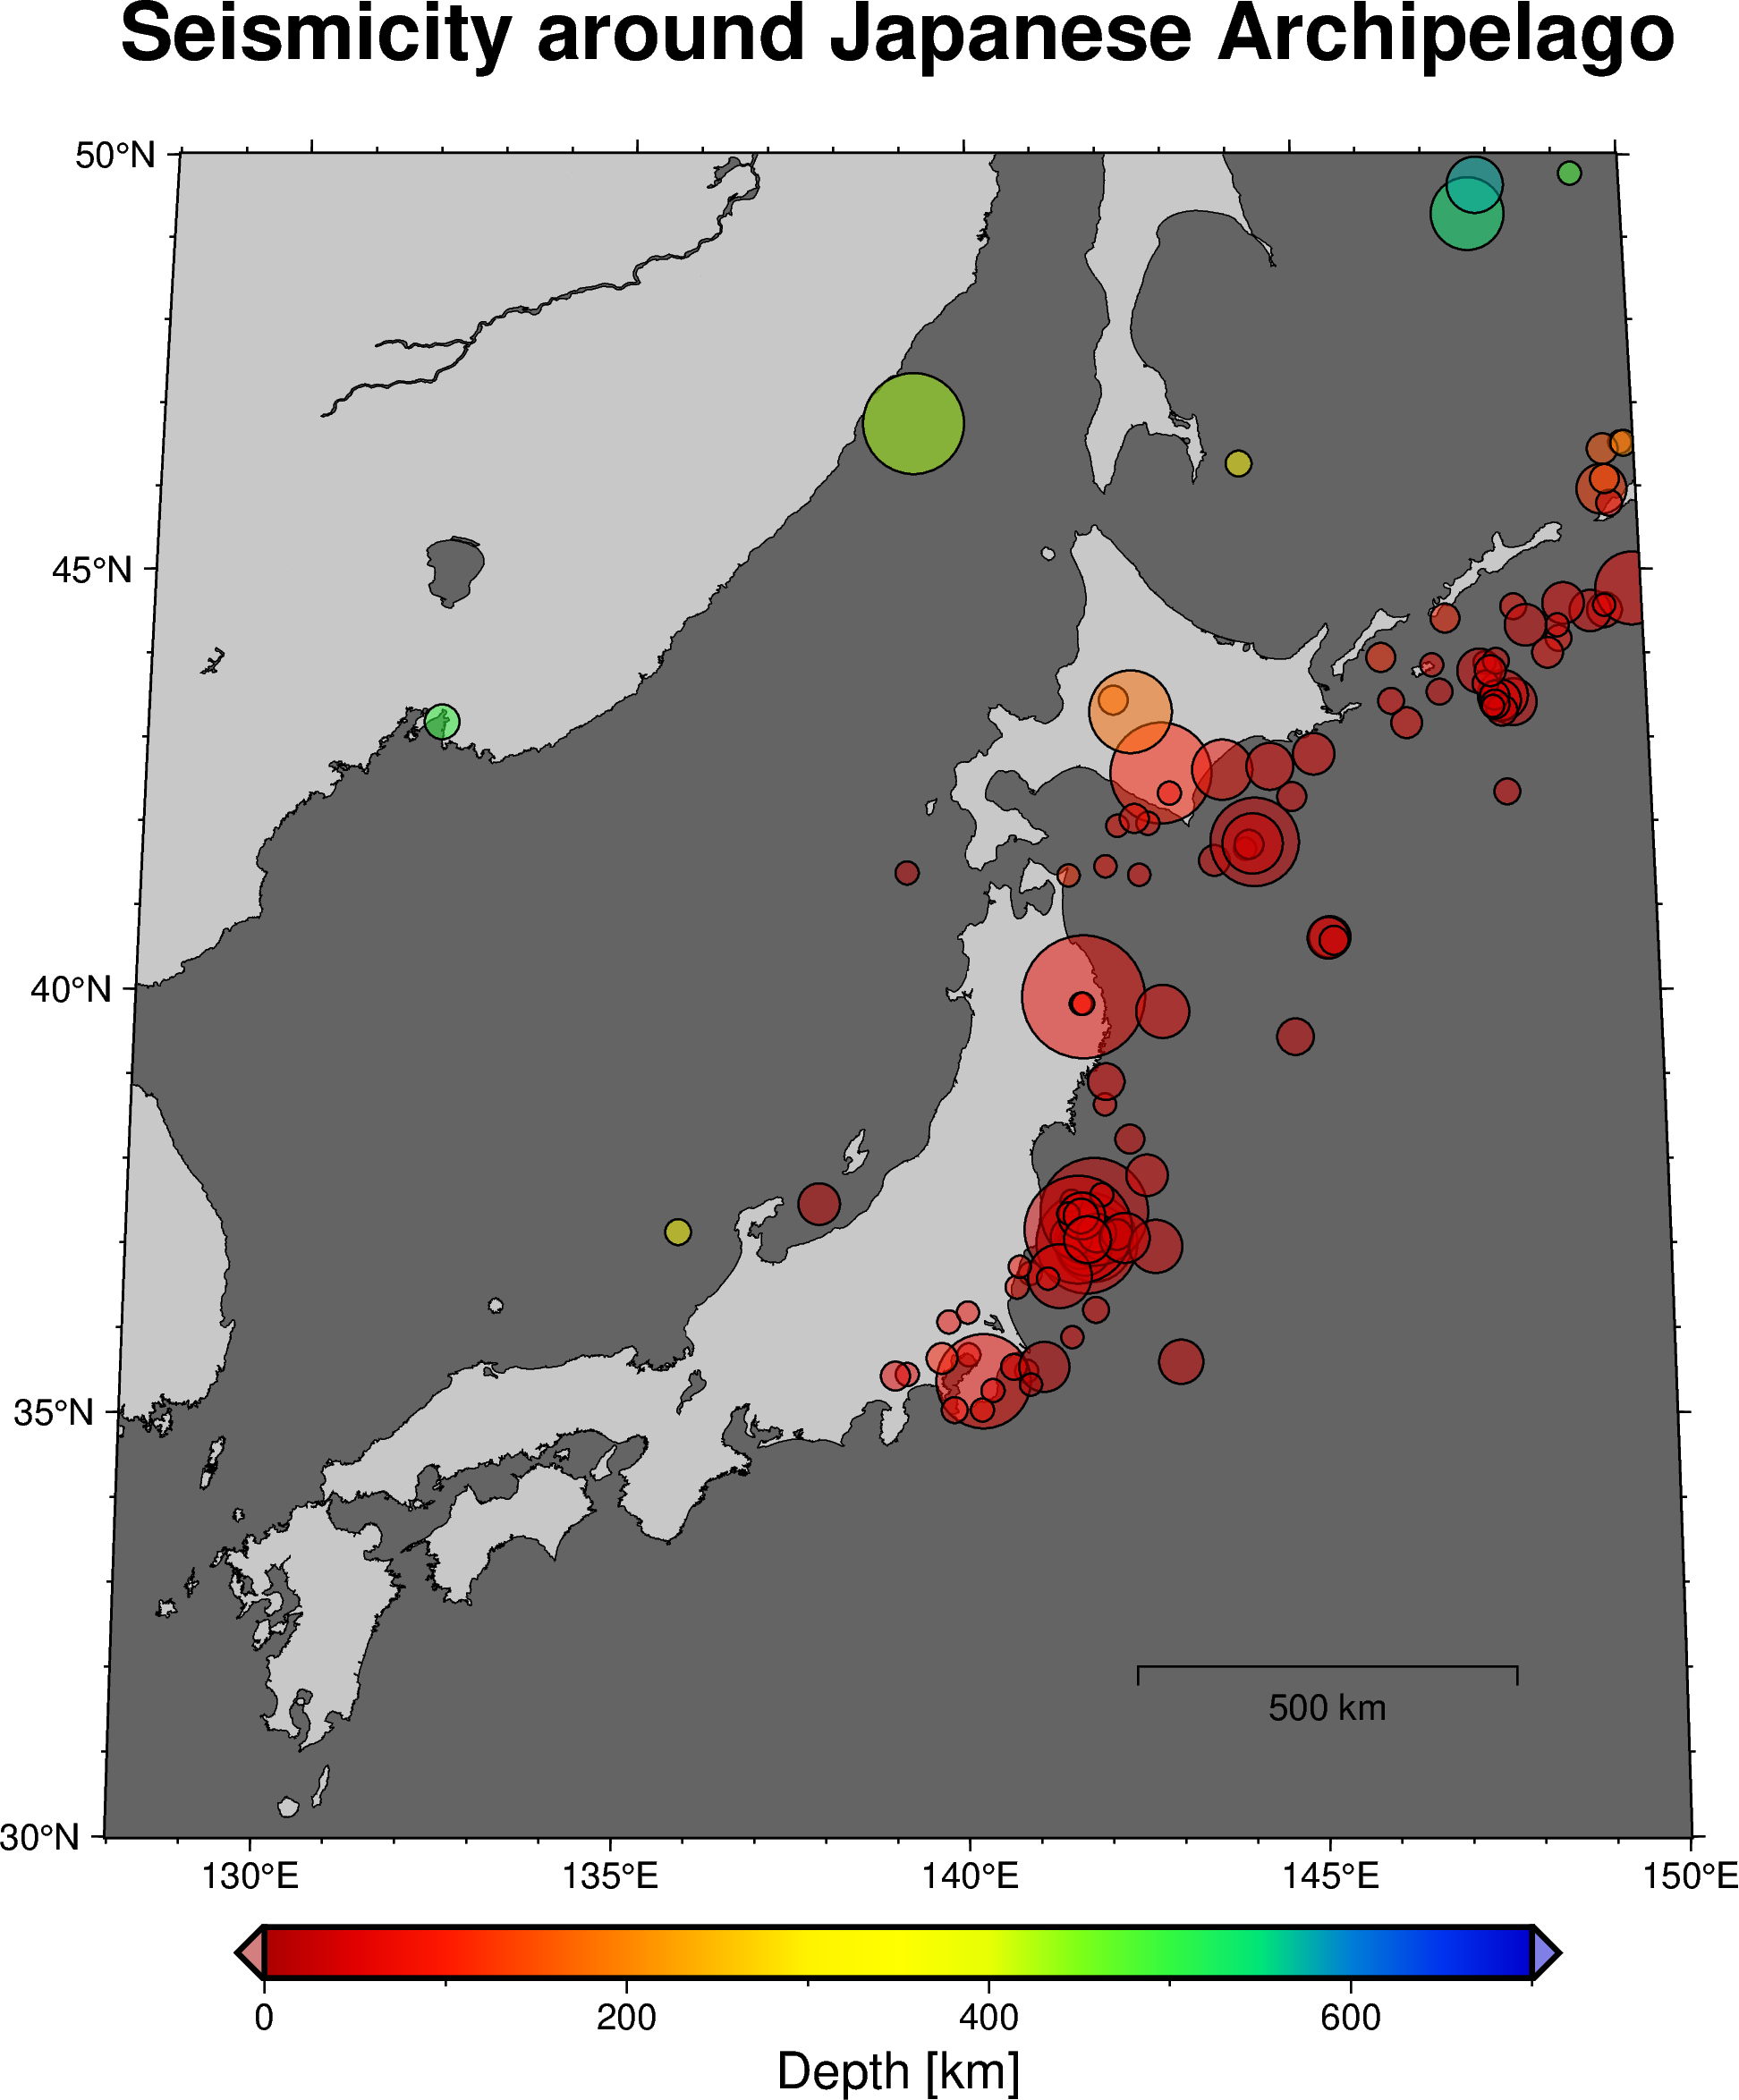

In [14]:
fig = pygmt.Figure()

fig.basemap(
    region     = [128,150,30, 50],
    projection = 'N139/15c', 
    frame      = ['WSen+t"Seismicity around Japanese Archipelago"', 'xaf', 'yaf']
)

fig.coast(
    land        = '200', 
    water       = '100', 
    resolution  = 'h', 
    area_thresh = '100', 
    map_scale   = '145/32/32/500',
    shorelines  = 'default,black'
)

pygmt.makecpt(
    cmap         = 'seis',        # カラーマップを選択
    series       = [0, 700, 50],  # min/max/increment
    background   = True,          # 値の上限・下限超過データの色を上限値・下限値と等しくする
    continuous   = True, 
    transparency = 50    
)

fig.plot(
    x     = hypdata.longitude,
    y     = hypdata.latitude,
    style = 'c',         
    pen   = 'thinner,black', 
    size  = 0.05 + 0.01 * (2**hypdata.magnitude),  # サイズ指定（cm）    
    cmap  = True,                                  # カラーマップ利用
    color = hypdata.depth_km,                      # 深さデータに基づき色を判断
)

fig.colorbar(
    position = '+e',
    frame    = ['x+l"Depth [km]"'], 
)


fig.show()

### カラーパレットの扱い

`pygmt.makecpt` でカラーパレットファイルを作成できます．
デフォルトでは，作成したカラーパレットがそのセッションの標準として登録され，それ以降のコマンドでのカラーパレットとして自動的に利用されます．

複数のカラーパレットを同時に使い分けたいなど，明示的にカラーパレットを指示したいときには，`pygmt.makecpt`  の `output` オプションでファイル名を指定して `.cpt` ファイルを作成することもできます．その場合には，`plot` コマンドの `cmap` オプションにはその `.cpt` ファイル名を指定します．

また，`fig.colorbar` は指定あるいは標準のカラーパレットに基づきカラースケールを描画します．位置指定を明示的にしない場合には，直前に描画した図の下部中央に配置されます．`frame` には数多くの指定ができるようですが，特に `+e`を指定すると，カラースケールの上限と下限を超えた値の色をカラースケール両側の三角形に示してくれます．


```{admonition} TODO
- 複数のカラーパレットを1枚の画像上の複数の絵にそれぞれ使うのであれば，`fig.subplot()` を用いるほうが便利そうだ．
- `colorbar` の位置指定の方法をまとめること．
```

## 地形段彩図の描画

手持ちのNetCDF（`grd` or `nc`）ファイルを描画するのはもちろん，GMT6からはネットワーク越しにグローバルな地形データを取得するコマンドが提供されています．そこで，ここではその `pygmt` 版を用いて，地形図の描画を行います．

In [16]:
grid_data = pygmt.datasets.load_earth_relief(
    resolution='01m',
    region = [128, 150, 28, 50]
)

上記のコマンドで，`region` で指定した地域の地形を `resolution` の解像度で読み込み，左辺の変数（`grid_data`）に格納します．この変数を用いてあとで地形図を作成します．

`region`の指定方法はこれまでと同じです．省略した場合にはグローバルデータが読み込まれます．

`resolution`は `01d`, `30m`, `20m`, `15m`, `10m`, `06m`, `05m`, `04m`, `03m`, `02m`, `01m`, `30s`, `15s`, `03s`, `01s` から，つまり1秒角から1度までのうちからどれか一つを選びます．

ダウンロードされるデータはSRTM（Shuttle Rader Topography Mission）で，解像度によりデータソース（提供年）が異なるようです．また，1秒と3秒グリッドには海底地形データが存在しないため，15秒データから補間されます．ダウンロードしたデータは `~/.gmt/` 以下にキャッシュされます．あまり細かいグリッドで広域のデータを読み込むと，ダウンロードにもプロットにも時間がかかるので，注意してください．

段彩図をより見栄え良くするには，`grdgradient`による傾斜データの作成と利用が有効です．

In [19]:
gradient_data = pygmt.grdgradient(
    grid      = grid_data,
    azimuth   = [45, 135], 
    normalize = 'e0.7'
)

GMTの `grdgradient` と同じですが，地形の可視化に用いる場合には方角 `azimuth` を複数方向の組み合わせにし，かつ `normalize` を上記の例程度の値にしておくのが良いようです．

```{admonition} ToDo
[Demo](https://www.pygmt.org/dev/gallery/images/grdgradient.html#sphx-glr-gallery-images-grdgradient-py)を見ると，`radiance`パラメータにより計算した`grd`データで地形可視化を行っている．要調査．
```

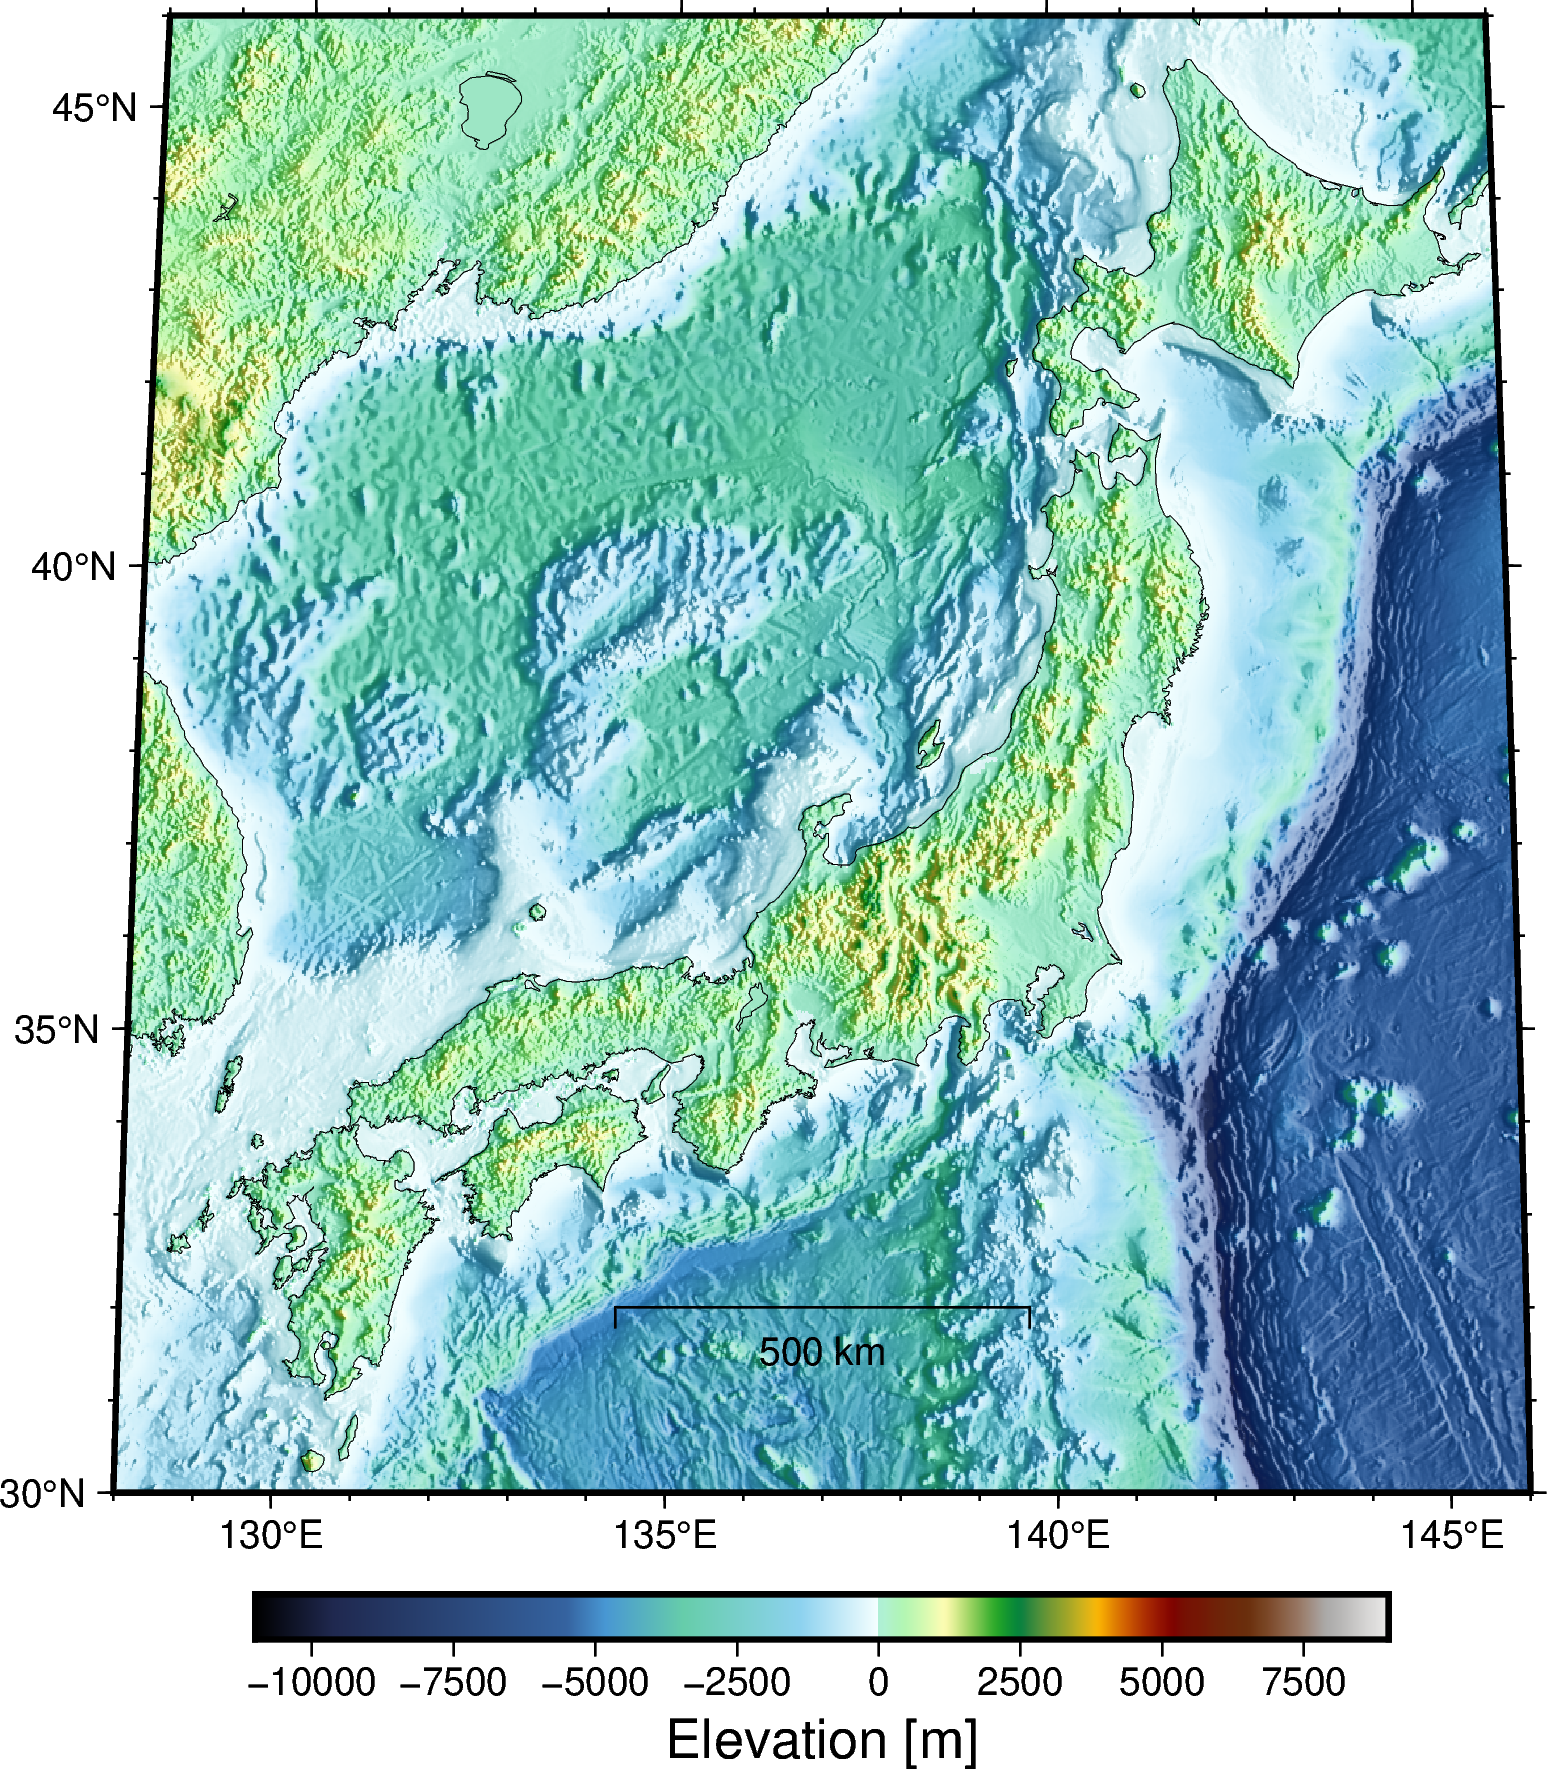

In [23]:
fig = pygmt.Figure()

pygmt.makecpt(
    cmap = 'earth', 
)

fig.grdimage(
    projection = 'N138/12c', 
    region     = [128, 146, 30, 46], 
    grid       = grid_data, 
    shading    = gradient_data
)

fig.coast(
    area_thresh = '100', 
    map_scale   = '137/32/32/500',
    shorelines  = 'faint,black',
    frame       = ['WSen', 'xaf', 'yaf']
)

fig.colorbar(
    frame = ['a2500', 'x+l"Elevation [m]"']
)

fig.show()

## XYグラフ
```{admonition} ToDo
Coming Soon
```

## 時系列の扱い

```{admonition} ToDo
Coming Soon
```

## 2次元データ：等間隔メッシュの場合

$z(x,y)$ のような形式で，$x$, $y$が等間隔のメッシュで与えられているデータを可視化しています．

まず，サンプルとして NumPy で適当な等間隔データを作成してみる．

```{attention}
筆者がNumpyに詳しくないので，コンパイラ言語的な効率の悪い計算をしている気がします．
もっと効率の良い計算方法があったら教えて下さい．
```

In [25]:
nx = 500
ny = 500
x = np.linspace(0, 2, nx+1)
y = np.linspace(0, 2, ny+1)

In [26]:
z = np.zeros([nx+1, ny+1])

for i in range(nx):
    for j in range(ny):
        a = np.pi * ( x[i]    - np.sqrt(3.0) * y[j] )
        b = np.pi * ( 3.*x[i] + np.sqrt(3.0) * y[j] )
        z[i,j] = np.cos(2*a) * np.cos(4*b) + np.cos(5*a) * np.cos(3*b) + np.cos(7*a) * np.cos(b)

試しにmatplotlibでプロットしてみると，以下のような感じです．

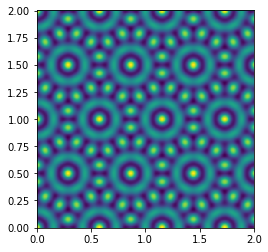

In [27]:
g = plt.subplot()
g.pcolormesh(x, y, z, shading='auto')
g.set_aspect('equal')

このデータを pygmt の `xyz2grd` を用いて grdデータにしてプロットしてみます．

```{note}
2021年12月現在，`xyz2grd` はx, y, zそれぞれ1次元配列にしないと渡せない．そのため，`np.meshgrid()`と `ravel()` メソッドを通じて `nx * ny` サイズの1次元配列を作っている．

ただし，この[Issue](https://github.com/GenericMappingTools/pygmt/pull/1566)を見る限り，おそらく近い将来にもとの `x[1:nx]`, `y[1:ny]`, `z[1:nx, 1:ny]` のデータを直接渡す事ができるようになりそう．そうすればもっとスッキリとコードが書けるようになると思われる．
```

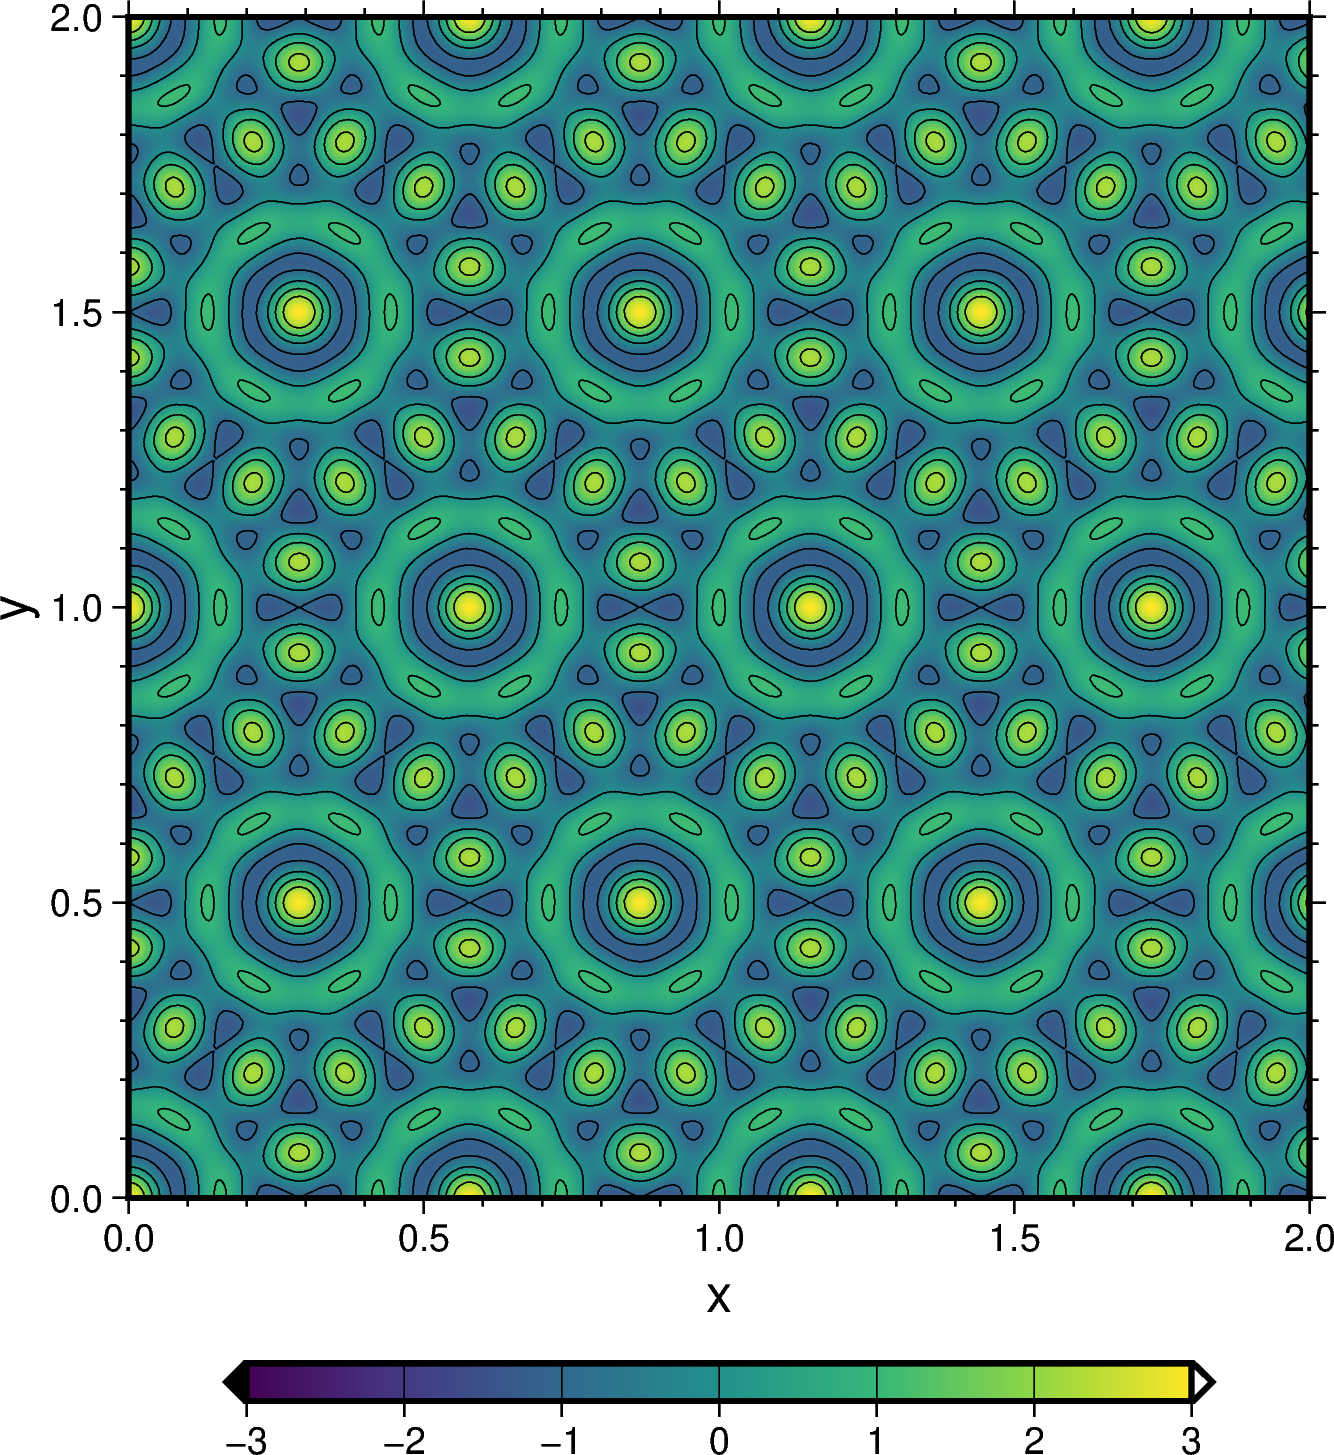

In [154]:
fig = pygmt.Figure()

X, Y = np.meshgrid(x, y)

grddata = pygmt.xyz2grd(
    region = [0, 2, 0, 2],     
    spacing = '0.004/0.004', 
    x = X.ravel(),
    y = Y.ravel(), 
    z = z.ravel()
)

pygmt.makecpt(
    cmap = 'viridis', 
    series = [-3, 3, 1], 
    continuous = True
)

fig.grdimage(
    grid = grddata, 
    projection = 'X10c/10c', 
    frame = ['WSen', 'xaf+l"x"', 'yaf+l"y"'],    
)

fig.grdcontour(
    grid = grddata, 
    interval = 1, 
    pen = 'default,black'
)

fig.colorbar(
    position = '+e'    
)

fig.show()

## 2次元データの補間と可視化

続いて，粗いデータを補間しつつプロットしてみましょう．

サンプルデータとして，Wikipediaの[双3次補間](https://en.wikipedia.org/wiki/Bicubic_interpolation)の解説にある例を採用します．[ここ](https://commons.wikimedia.org/wiki/File:Interpolation-bicubic.svg)からコードをお借りして（Creditはリンク先参照；CC-BY），以下のようなデータを使います．まずはデータ生成とmatplolibでの標準的可視化の例を示します．

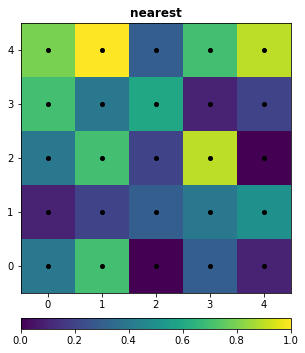

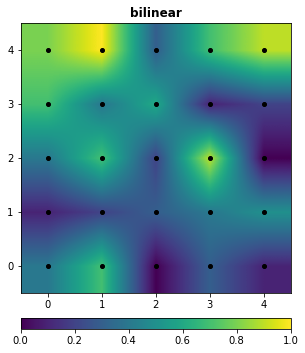

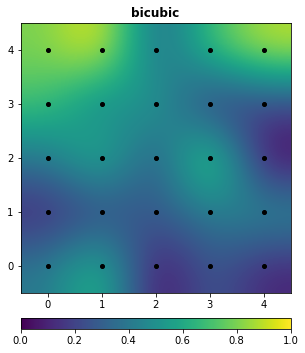

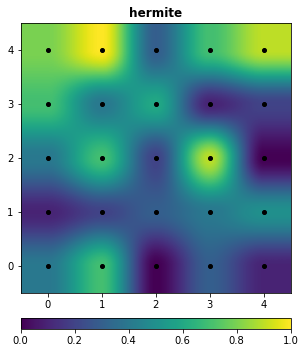

In [31]:
METHODS = [ 'nearest', 'bilinear', 'bicubic', 'hermite' ]
FORMATS = [ 'png', 'pdf', 'svg' ]
COLORS  = 'viridis'

N = 5
np.random.seed(1)
grid = np.arange(0, N, 1)
data = np.round(np.random.rand(N, N), 1)
mesh = np.meshgrid(grid, grid)

for interp in METHODS:

    fig = plt.figure(figsize=(5,5))

    ax = fig.add_axes([0.125, 0.175, 0.75, 0.75])
    plt.imshow(data, interpolation=interp, cmap=COLORS, vmin=0, vmax=1)
    plt.plot(mesh[0], mesh[1], marker='.', ms=8, color='k', lw=0)
    plt.title(interp, weight='bold')
    plt.xlim(grid.min()-0.5, grid.max()+0.5)
    plt.ylim(grid.min()-0.5, grid.max()+0.5)
    plt.xticks(grid)
    plt.yticks(grid)

    cax = fig.add_axes([0.125, 0.075, 0.75, 0.03])
    cb = plt.colorbar(cax=cax, orientation='horizontal',
                      ticks=np.linspace(0, 1, 6))
    cb.solids.set_edgecolor('face')

ここで作られたデータを `ravel()`メソッド1次元化し，`pygmt.surface`で補間をしてみます．比較のため `pygmt.xyz2grd` で粗い間隔のままのプロットも作成します．

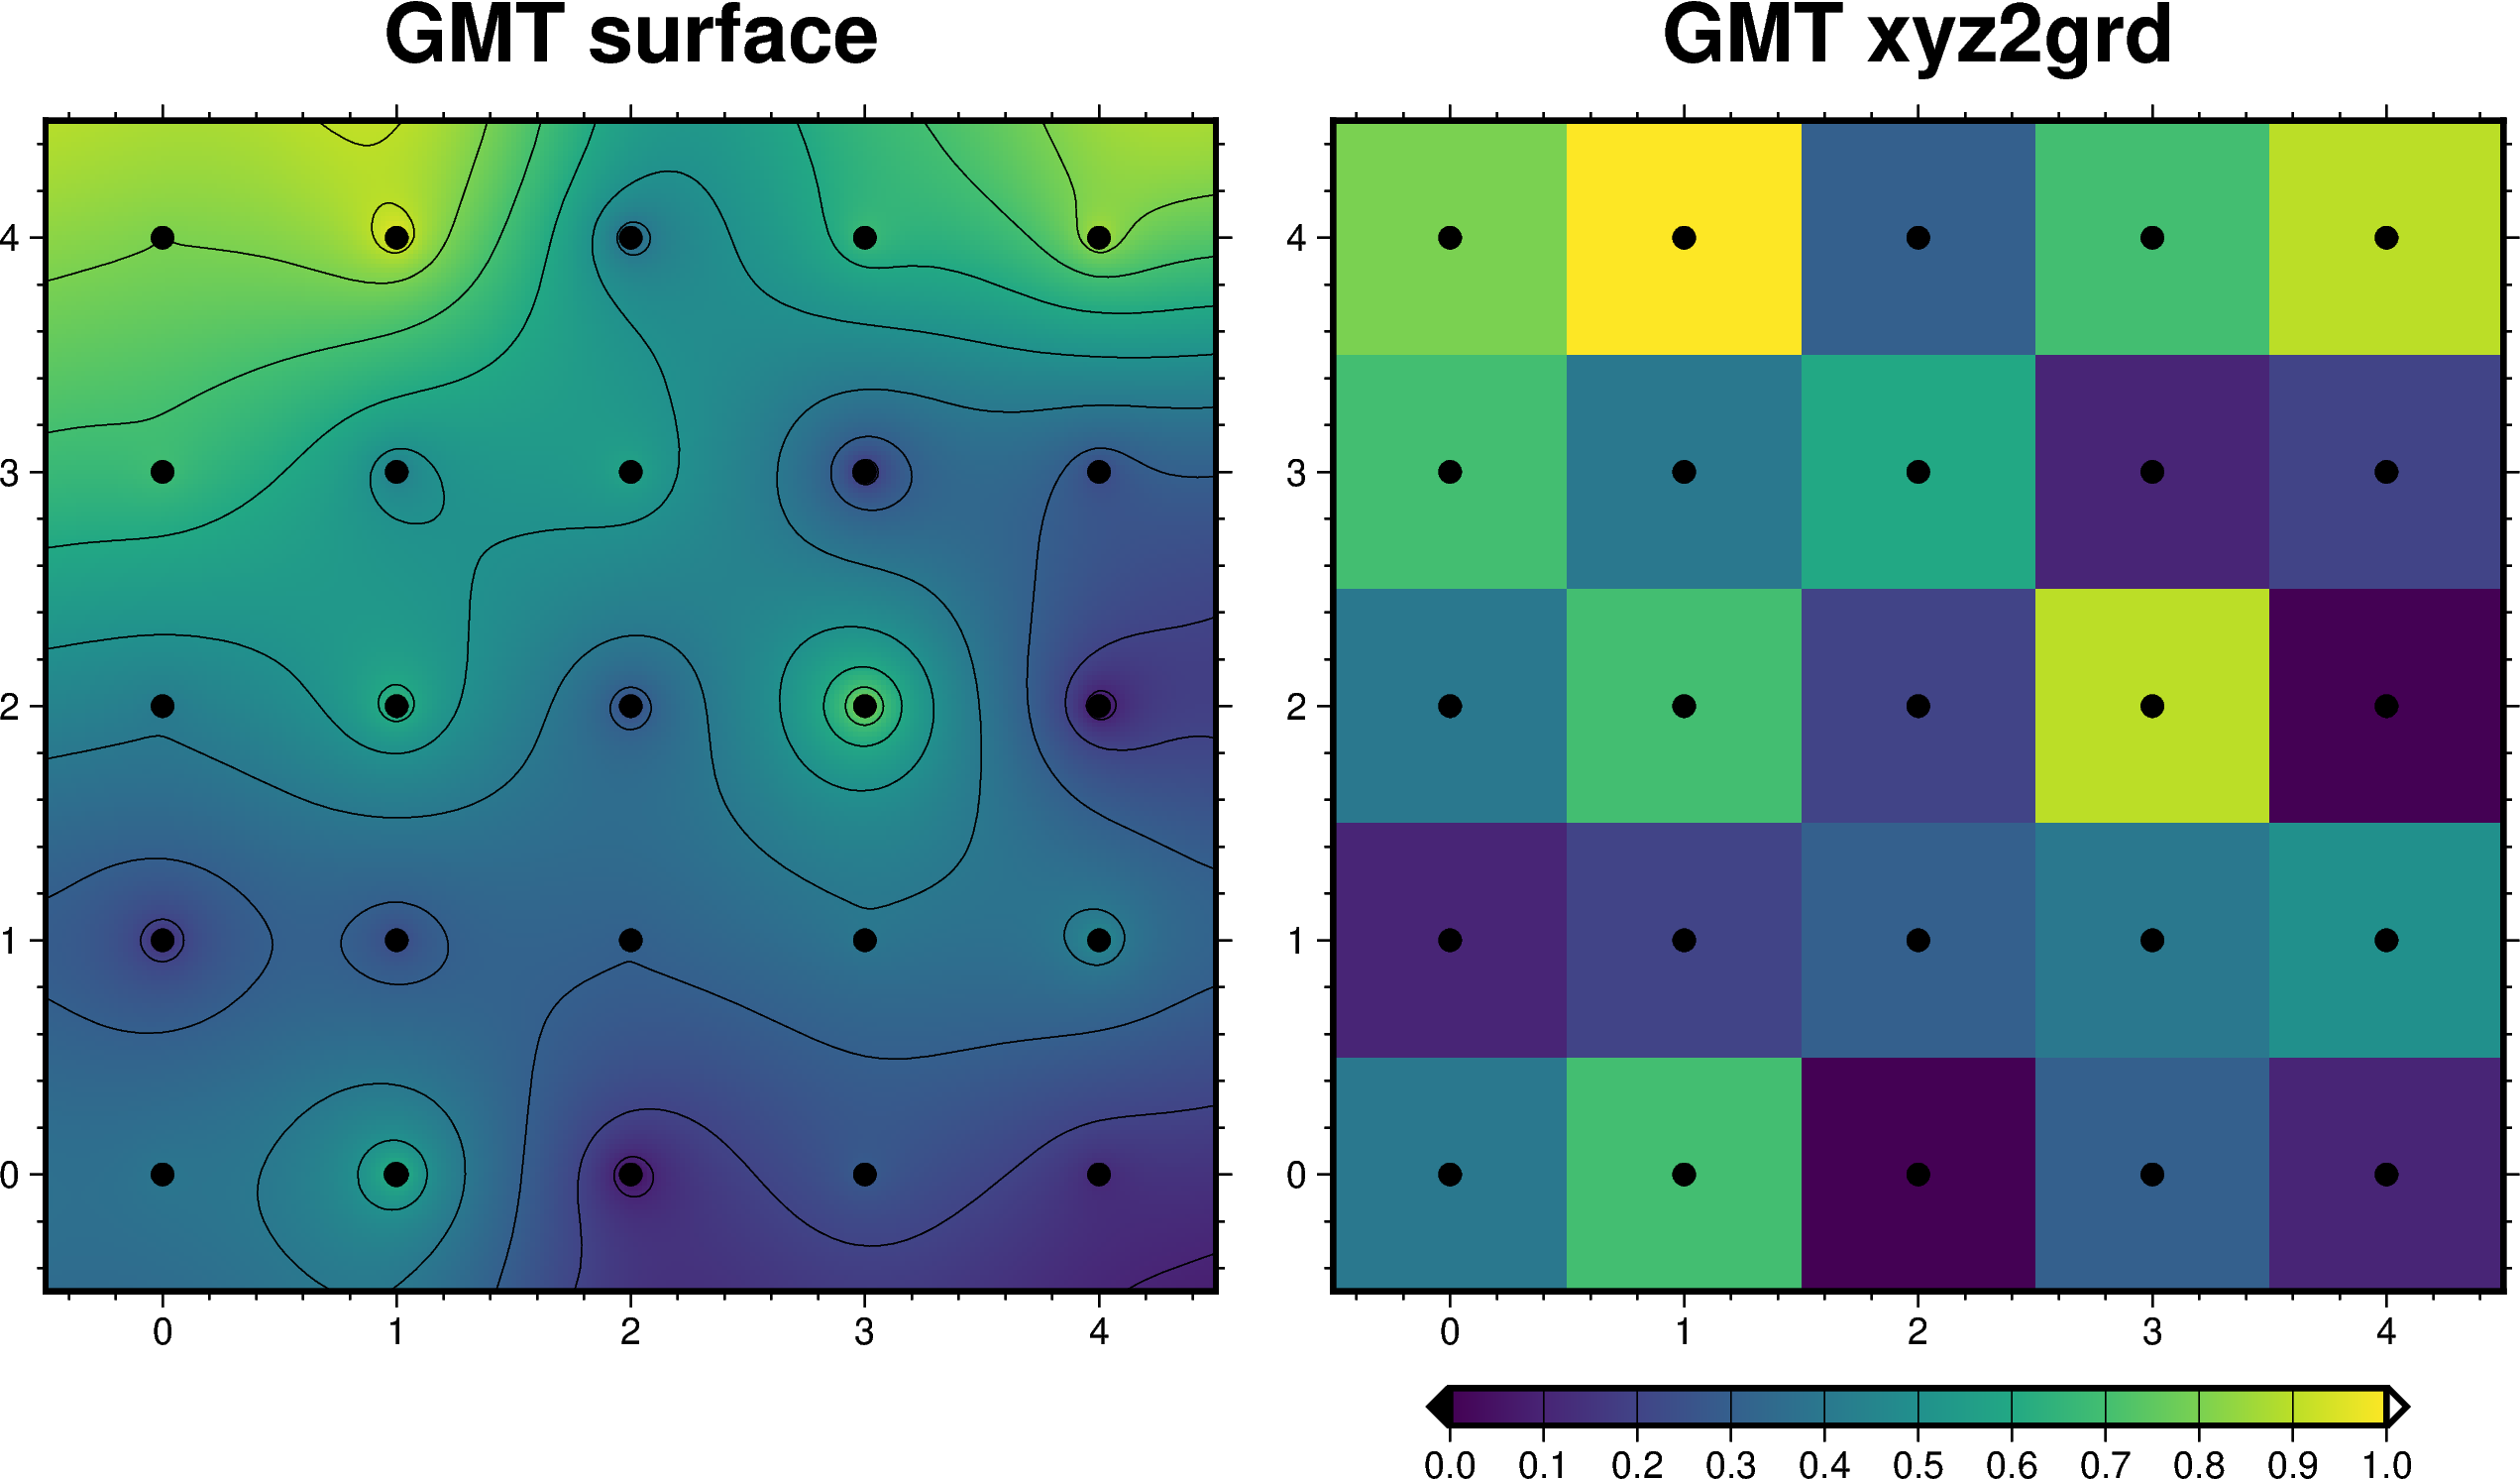

In [34]:
fig = pygmt.Figure()

griddata_s = pygmt.surface(
    x       = mesh[0].ravel(), 
    y       = mesh[1].ravel(), 
    z       = data.ravel(), 
    region  = [-0.5, 4.5, -0.5, 4.5], 
    spacing = '0.02/0.02',
    T       = 0.5 # tension 値．マニュアルにはまだないが動く．無指定は0
)

griddata_x = pygmt.xyz2grd(
    x       = mesh[0].ravel(), 
    y       = mesh[1].ravel(), 
    z       = data.ravel(), 
    region  = [-0.5, 4.5, -0.5, 4.5], 
    spacing = '1/1',
    registration = 'p'
)


pygmt.makecpt(
    cmap = 'viridis', 
    series = [0, 1, 0.1], 
    continuous = True
)

fig.grdimage(
    grid = griddata_s, 
    projection = 'X10c/10c',
    frame = ['WSen+t"GMT surface"', 'xaf', 'yaf']    
)

fig.grdcontour( 
    grid = griddata_s, 
    pen = 'default,black', 
    annotation = '-'
)

fig.plot(
    x = mesh[0].ravel(), 
    y = mesh[1].ravel(), 
    style = 'c0.2c', 
    color = 'black', 
)

# 右にずれる
fig.shift_origin( xshift = 11 )


fig.grdimage(
    grid = griddata_x, 
    projection = 'X10c/10c',
    frame = ['WSen+t"GMT xyz2grd"', 'xaf', 'yaf'], 
)

fig.plot(
    x = mesh[0].ravel(), 
    y = mesh[1].ravel(), 
    style = 'c0.2c', 
    color = 'black', 
)

fig.colorbar(
    position = '+e'    
)

fig.show()

```{note}
`pygmt.surface` は tension factor $t$ という量で補間の状況をコントロールします．しかし，その値を指定するオリジナルのGMTの `-T` オプションが，まだ PyGMTの公式マニュアルには記載されていません．
しかし，試みに `pygmt.surface{T = }` を実行したところ動作はするようです．
```

## GMTの微調整

GMTは `gmt defaults` コマンドでさまざまな調整を行うことができる．

```{admonition} ToDo
Coming Soon
```

## Obspyとの連携

例として，SAC (Seismic Analysis Code) に含まれている地震波形例をファイルとして保存し，それをObsPyから読み込んでみよう．SACでは以下のようなコマンドを実行する．

```bash
$ sac
 SEISMIC ANALYSIS CODE [10/13/2020 (Version 101.6a)]
 Copyright 1995 Regents of the University of California

SAC> funcgen seismogram
SAC> w dat/example.sac
SAC> quit
```

ObsPy で読み込むには `obspy.core.read` ．任意個数の地震波形を読み込む stream 形式に波形が格納される．今回は1波形だけなので，その最初のリスト成分を `trace0` として抽出した．

In [132]:
trace = obspy.core.read('./dat/example.sac')
trace0 = trace[0]

波形に付随するメソッドの `plot` を使うだけで適当にプロットしてくれる．

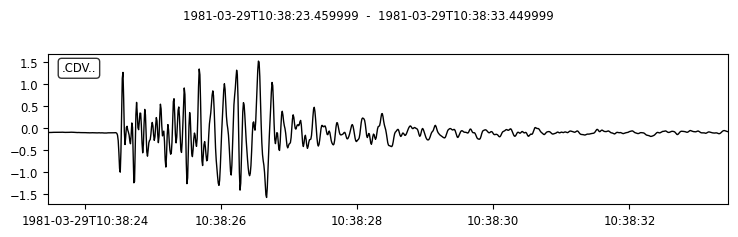

In [133]:
p = trace0.plot()

この中には `stats` に様々なヘッダ情報が含まれる．今回はSAC形式から読み込まれているので，`sac`という辞書にそのヘッダが格納されている．

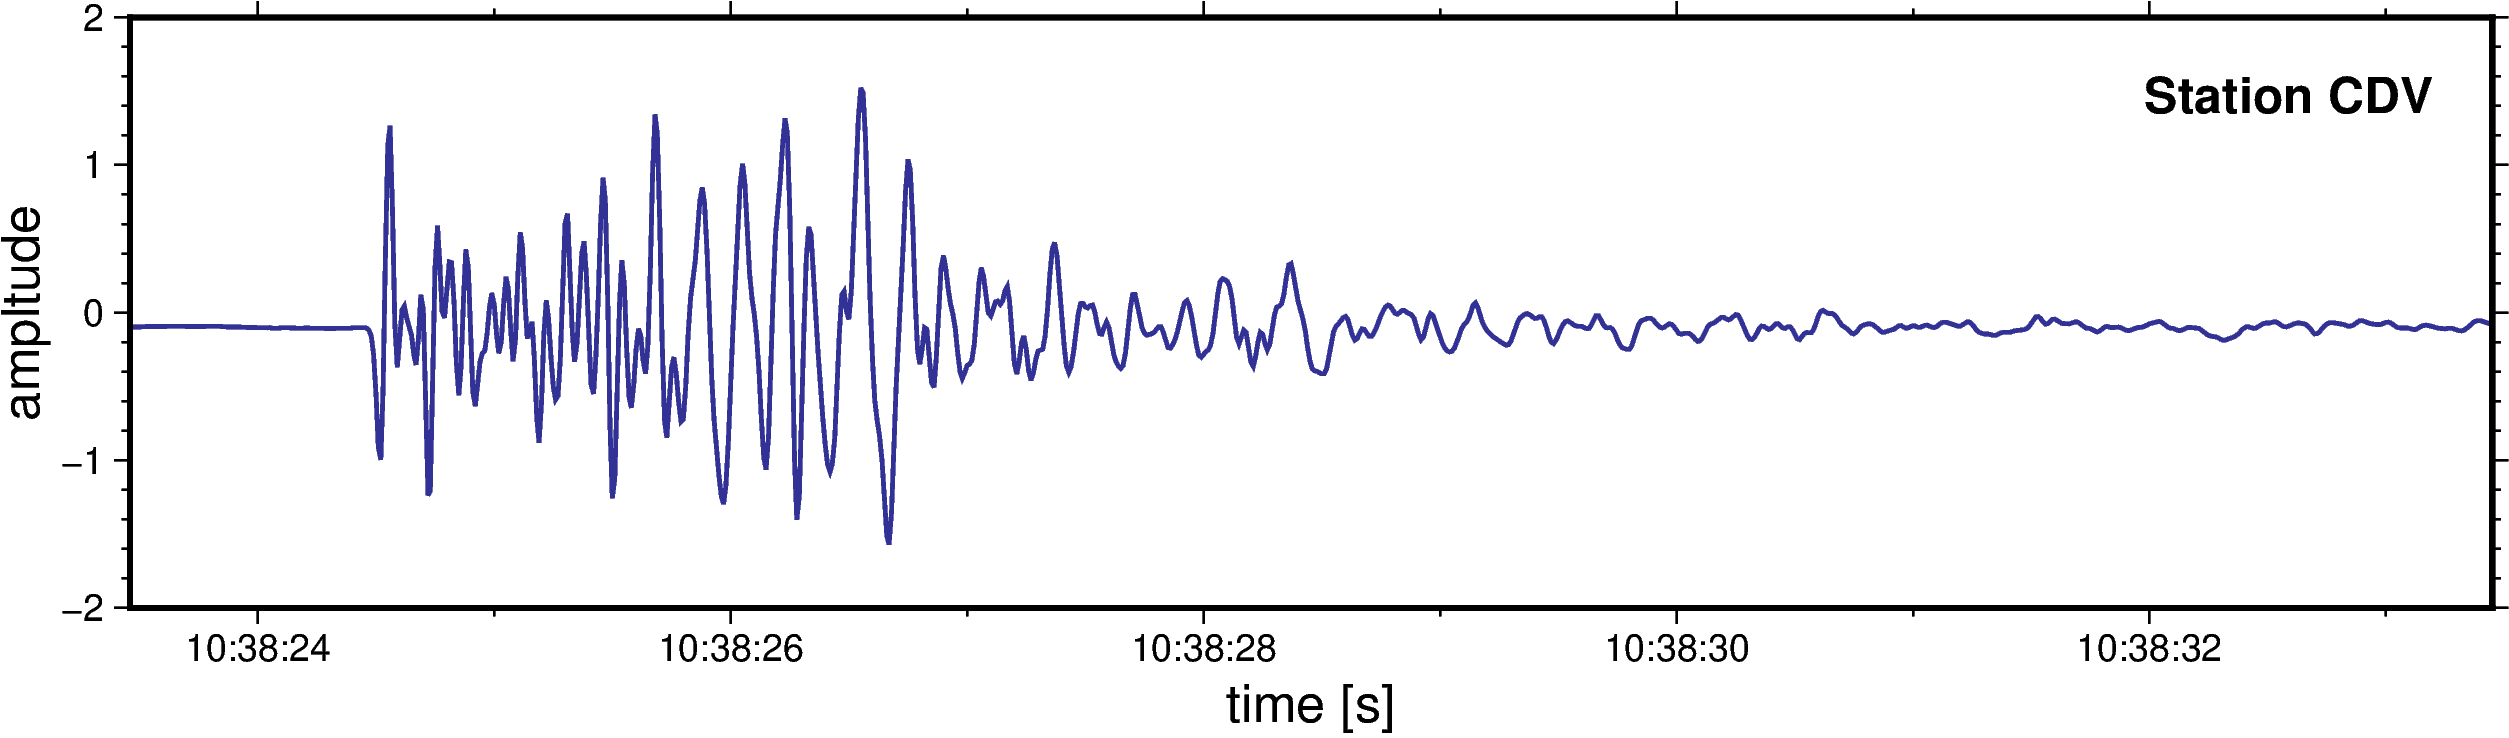

In [135]:
fig = pygmt.Figure()

fig.plot(
    projection = 'X20c/5c',
    region = [trace0.stats.starttime, trace0.stats.endtime, -2, 2],
    x = trace0.times("timestamp"), 
    y = trace0.data,
    pen = 'thick,50/50/150'
)

fig.text(
    text = "Station " + trace0.stats.station, 
    position = 'RT', 
    offset = 'j0.5c/0.5c',
    font = '12p,Helvetica-Bold,Black'
)

fig.basemap(
    frame  = ['WSen', 'xaf+l"time [s]"', 'yaf+l"ampltude"' ],
)

fig.show()

```{admonition} ToDo
横軸が時間の場合と経過秒数の場合の2種類のプロットを作ってみたい．
あと任意のダウンロード波形のプロットも
```

## メカニズム解の表現

```{admonition} ToDo
Coming Soon
```